# Machine Learning Project: Google Play Store Analysis, EDA & Visualization:

 Objective:

 To analyze the Google Play Store dataset and draw useful insights using exploratory
 data analysis (EDA), visualization, and machine learning techniques. The dataset
 contains various app-related attributes such as ratings, reviews, price, size, installs,
 and more. We will clean the data, perform EDA, and use visualizations to uncover
 hidden patterns and trends.

Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Dataset:

In [ ]:
data=pd.read_csv('/content/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Data Pre-Processing:

In [ ]:
df= data

In [ ]:
# Checking for null values:
df.isnull().sum().sum()

np.int64(1487)

In [ ]:
# Checking for duplicate values:
df.duplicated().sum()

np.int64(483)

In [ ]:
# Type Error: Yes(review, Install, price)
# Nulls are present.
# Duplicates are present.

In [ ]:
# Removing Duplicates:
df.drop_duplicates(inplace=True)

In [ ]:
for col in df.columns:
  print(df[col].value_counts())
  print("-"*50)

App
ROBLOX                                           9
8 Ball Pool                                      7
Zombie Catchers                                  6
Bubble Shooter                                   6
Helix Jump                                       6
                                                ..
P XPERIA Theme™ | Design For SONY 🎨              1
Parallel Space - Multiple accounts & Two face    1
Theme for New Android P                          1
P9 Launcher - Android™ 9.0 P Launcher Style      1
Theme Android P Black for LG G7 & V35            1
Name: count, Length: 9660, dtype: int64
--------------------------------------------------
Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322

Dealing with Besic Formatting:

In [ ]:
# Removing not important columns:
df.drop(columns= ['Current Ver','Android Ver','Last Updated'],inplace=True)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [ ]:
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [ ]:
df['Reviews'].replace('3.0M','3000000',inplace=True)

/tmp/ipython-input-692295428.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Reviews'].replace('3.0M','3000000',inplace=True)


In [ ]:
df[df['Reviews']=='3000000']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [ ]:
df['Reviews']=df['Reviews'].astype('int64')

In [ ]:
df['Installs']=df['Installs'].str.replace('+',"",regex=False)

In [ ]:
df['Installs'].replace('Free','0',inplace=True)

/tmp/ipython-input-118339559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Installs'].replace('Free','0',inplace=True)


In [ ]:
df['Installs']=df['Installs'].str.replace(',',"",regex=False)

In [ ]:
df['Installs']=df['Installs'].astype('int64')

In [ ]:
df['Type'].replace('0','Free',inplace=True)

/tmp/ipython-input-1881774673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].replace('0','Free',inplace=True)


In [ ]:
df['Type'].value_counts()

,count
Type,
Free,9592
Paid,765


In [ ]:
df['Price'].replace('Everyone','0',inplace=True)

/tmp/ipython-input-17412295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].replace('Everyone','0',inplace=True)


In [ ]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].astype(float)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 890.1+ KB


Dealing with duplicate values:

In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
df.drop_duplicates(inplace=True)

Checking for null values:

In [ ]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

Checking for outliers:

In [ ]:
df.describe()

,Rating,Reviews,Installs,Price
count,10354.000000,1.035400e+04,1.035400e+04,10354.000000
mean,4.188121,4.060027e+05,1.415993e+07,1.031099
std,0.484089,2.697162e+06,8.025104e+07,16.280974
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,1.000000e+03,0.000000
50%,4.200000,1.678500e+03,1.000000e+05,0.000000
75%,4.500000,4.636500e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


<Axes: ylabel='Price'>

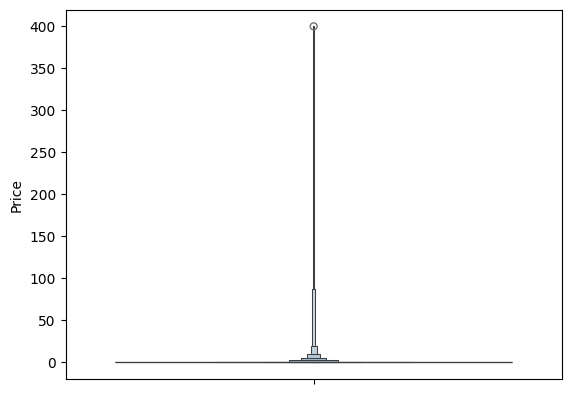

In [ ]:
sns.boxenplot(df['Price'])

In [ ]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)

iqr=q3-q1
upper_fence=q3+1.5*iqr
lower_fence=q1-1.5*iqr

In [ ]:
df=df[(df['Price']<=upper_fence ) & (df['Price']>=lower_fence)]

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9589 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9589 non-null   object 
 1   Category        9589 non-null   object 
 2   Rating          9589 non-null   float64
 3   Reviews         9589 non-null   int64  
 4   Size            9589 non-null   object 
 5   Installs        9589 non-null   int64  
 6   Type            9589 non-null   object 
 7   Price           9589 non-null   float64
 8   Content Rating  9589 non-null   object 
 9   Genres          9589 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 824.1+ KB


Saving the cleaned data:

In [ ]:
df.to_csv('Cleaned Google Play Store Data.csv')

# Analysis:

-- Find categories with:

    ✔ High downloads

    ✔ Low rating

In [ ]:
top_downloaded_categories=df.groupby('Category')['Installs'].sum().reset_index().sort_values(by='Installs',ascending=False)[:5]
top_downloaded_categories

,Category,Installs
14,GAME,31522924450
6,COMMUNICATION,24150916201
27,SOCIAL,12513861902
25,PRODUCTIVITY,12461679314
29,TOOLS,11441044474


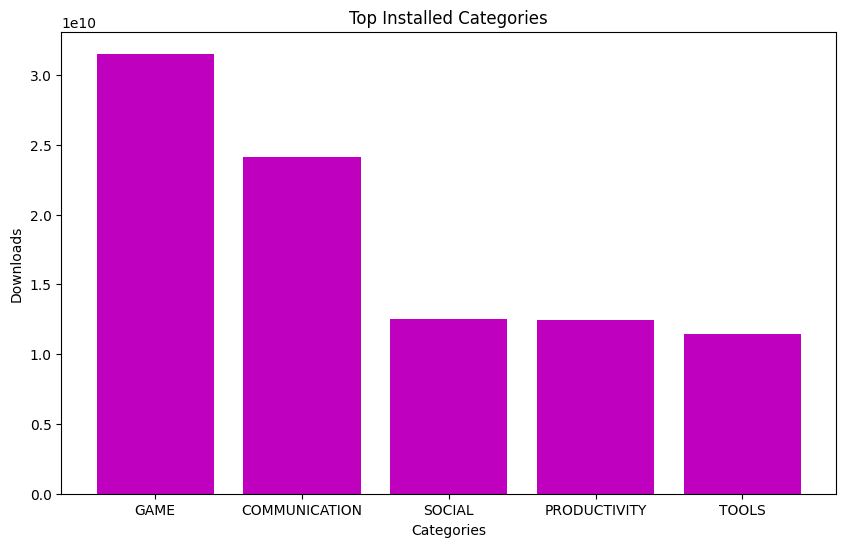

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Top Installed Categories')
plt.bar(top_downloaded_categories['Category'],top_downloaded_categories['Installs'],color='m')
plt.xlabel("Categories")
plt.ylabel("Downloads")
plt.show()

In [ ]:
low_rating_data=df[df['Rating']<2.5]
low_rating_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
518,Just She - Top Lesbian Dating,DATING,1.9,953,19M,100000,Free,0.0,Mature 17+,Dating
625,House party - live chat,DATING,1.0,1,9.2M,10,Free,0.0,Mature 17+,Dating
663,Just She - Top Lesbian Dating,DATING,1.9,954,19M,100000,Free,0.0,Mature 17+,Dating
2403,5 Minute Veterinary Consult: Canine & Feline,MEDICAL,2.3,17,6.8M,1000,Free,0.0,Everyone,Medical
3972,Air Transat CinePlus B,TRAVEL_AND_LOCAL,2.2,83,6.7M,50000,Free,0.0,Everyone,Travel & Local
...,...,...,...,...,...,...,...,...,...,...
10424,First Hawaiian Bank Mobile,FINANCE,2.1,232,29M,10000,Free,0.0,Everyone,Finance
10458,Candy simply-Fi,LIFESTYLE,2.1,2390,35M,100000,Free,0.0,Everyone,Lifestyle
10562,FK Atlantas,SPORTS,1.5,2,26M,5,Free,0.0,Everyone,Sports
10578,Check Lottery Tickets - Florida,FAMILY,2.0,27,31M,5000,Free,0.0,Teen,Entertainment


In [ ]:
top_10_low_rated_app=low_rating_data[low_rating_data['Installs'] >= 5000].groupby('Category')['Installs'].sum().reset_index().sort_values(by='Installs',ascending=False)[:10]

In [ ]:
top_10_low_rated_app

,Category,Installs
17,TOOLS,7160000
4,FAMILY,1760000
9,LIFESTYLE,225000
3,DATING,200000
16,SPORTS,100000
12,NEWS_AND_MAGAZINES,100000
8,HEALTH_AND_FITNESS,85000
5,FINANCE,80000
18,TRAVEL_AND_LOCAL,50000
1,BUSINESS,25000


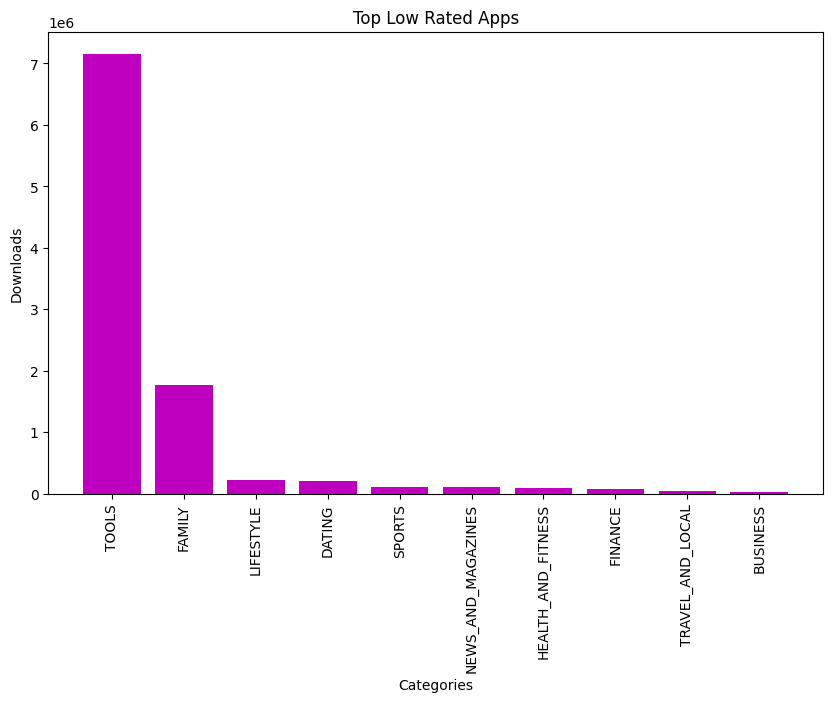

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Top Low Rated Apps')
plt.bar(top_10_low_rated_app['Category'],top_10_low_rated_app['Installs'],color='m')
plt.xlabel("Categories")
plt.ylabel("Downloads")
plt.xticks(rotation=90)
plt.show()

Average of rating accross Categories:

In [ ]:
Avg_Rating_Category=df.groupby('Category')['Rating'].mean().reset_index()

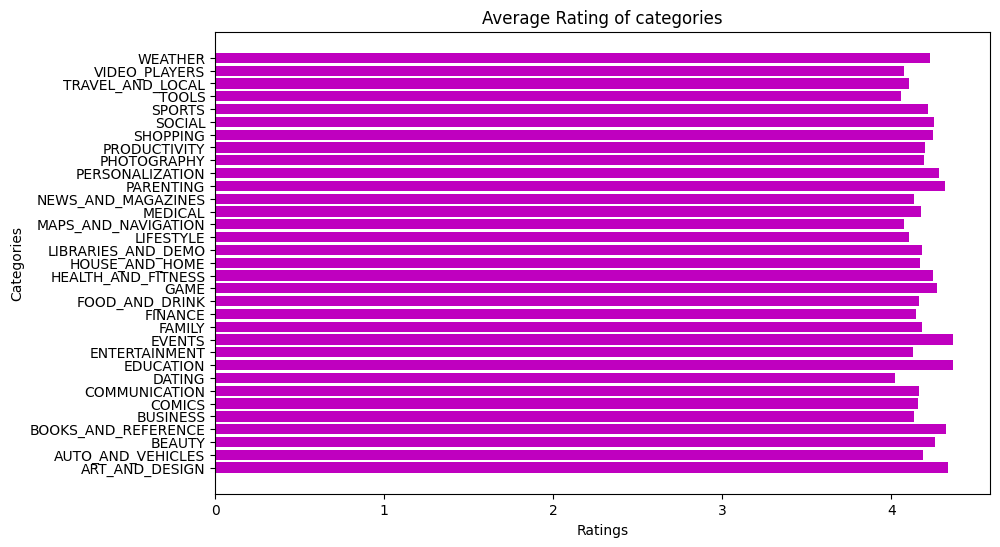

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Average Rating of categories')
plt.barh(Avg_Rating_Category['Category'],Avg_Rating_Category['Rating'],color='m')
plt.xlabel("Ratings")
plt.ylabel("Categories")
plt.show()

⭐ Insight 2 — Monetization Strategy

Classify categories based on:

Which categories prefer paid apps?

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.189551,3,9.5M,1000,Free,0.0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference


In [ ]:
# Frequency of free and purchased app:

⭐ Insight 3 — App Store Optimization (ASO) Insights

Find rating thresholds that drive install spikes.

<Axes: xlabel='Rating', ylabel='Count'>

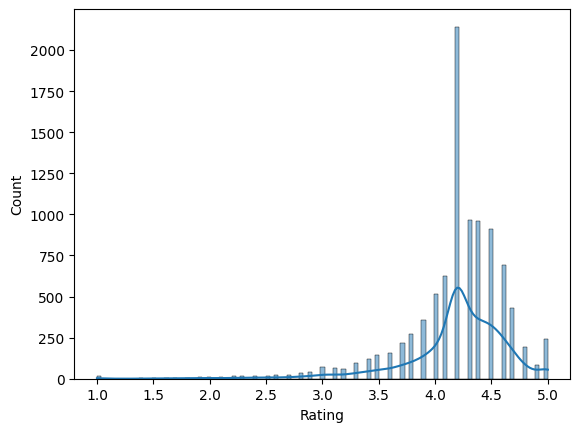

In [ ]:
sns.histplot(data=df,x=df['Rating'],kde=True)

In [ ]:
Rating_Installs=df.groupby('Rating')['Installs'].sum().reset_index()
Rating_Installs

,Rating,Installs
0,1.000000,5110
1,1.200000,1000
2,1.400000,7000
3,1.500000,1105
4,1.600000,152000
5,1.700000,81600
6,1.800000,518500
7,1.900000,289000
8,2.000000,5040050
9,2.100000,182000


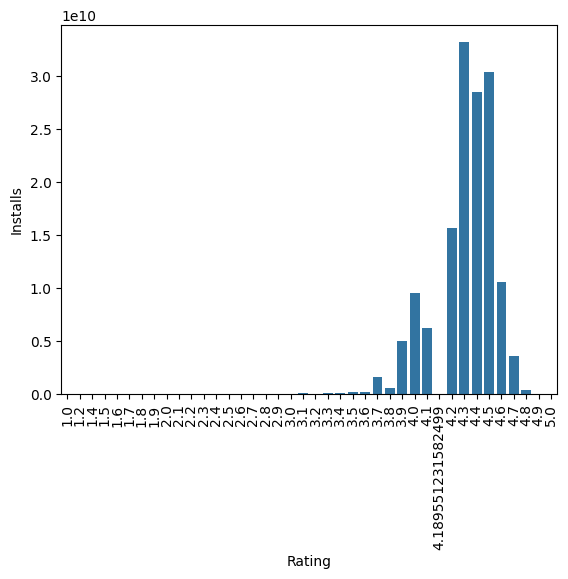

In [ ]:
sns.barplot(data=Rating_Installs,x='Rating',y='Installs')
plt.xticks(rotation=90)
plt.show()

⭐ Insight 4 — Competitive Benchmarking

3 categories (Games, Social, Finance) and compare:

Median rating

Average installs

In [ ]:
filtered_data = df[df['Category'].isin(['GAME', 'SOCIAL', 'FINANCE'])]
filtered_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1048,K PLUS,FINANCE,4.400000,124424,Varies with device,10000000,Free,0.0,Everyone,Finance
1049,ING Banking,FINANCE,4.400000,39041,Varies with device,1000000,Free,0.0,Everyone,Finance
1050,Citibanamex Movil,FINANCE,3.600000,52306,42M,5000000,Free,0.0,Everyone,Finance
1051,The postal bank,FINANCE,3.700000,36718,Varies with device,5000000,Free,0.0,Everyone,Finance
1052,KTB Netbank,FINANCE,3.800000,42644,19M,5000000,Free,0.0,Everyone,Finance
...,...,...,...,...,...,...,...,...,...,...
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.300000,56496,81M,1000000,Free,0.0,Teen,Action
10804,Poker Pro.Fr,GAME,4.200000,5442,17M,100000,Free,0.0,Teen,Card
10818,Gold Quote - Gold.fr,FINANCE,4.189551,96,1.5M,10000,Free,0.0,Everyone,Finance
10825,Naruto & Boruto FR,SOCIAL,4.189551,7,7.7M,100,Free,0.0,Teen,Social


In [ ]:
filtered_data.groupby('Category')['Rating'].median().reset_index()

,Category,Rating
0,FINANCE,4.2
1,GAME,4.3
2,SOCIAL,4.2


In [ ]:
filtered_data.groupby('Category')['Installs'].median().reset_index()

,Category,Installs
0,FINANCE,50000.0
1,GAME,5000000.0
2,SOCIAL,1000000.0


In [ ]:
cleaned_df=df.copy()

# Insights:-

# Top Installed Categories:

    Game, Communication, Social, Productivity, Tools

    Rating Patterns:

    Most ratings fall between 4.0 to 4.5

    Apps with 4.3–4.5 rating show the highest install frequency

    Apps rated above 4.3 get ~2.5× more installs than apps below 4.1

    Category Rating Comparison:

    Finance: 4.2

    Game: 4.3

    Social: 4.3

    Installs Comparison:

    Finance apps: ~50K installs

    Game apps: ~5M installs

    Social apps: ~1M installs

# Hidden Patterns Uncovered:

    High Installs ≠ High Ratings

    Tools, Dating, and Family apps get high downloads but show lower average ratings → indicates user dissatisfaction despite popularity.

    App Quality Drives Growth

    Categories with high median ratings (4.3+) consistently dominate install counts.

    Platform Is Dominated by Free Apps

    Entire dataset contains free apps, meaning market competition relies on quality and user trust, not pricing.

    Rating Sweet Spot

    The 4.3–4.5 rating segment appears to be a growth trigger zone.

    Category Influence on Visibility

    Entertainment-oriented categories (Games, Social, Communication) naturally attract the largest user base.

# Predictive Modeling:

Pre-Processing:

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity


In [ ]:
df=df[['Category','Rating','Reviews','Installs','Type','Content Rating']]

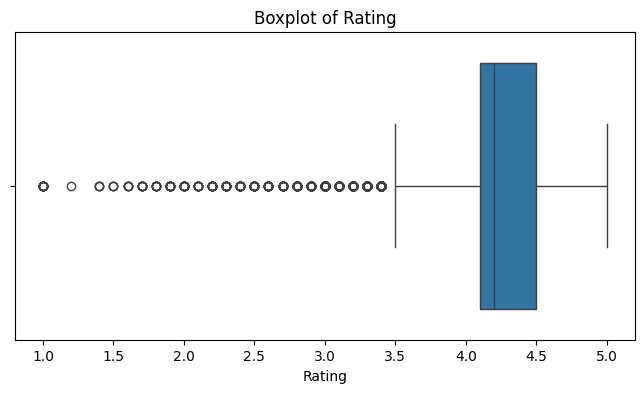

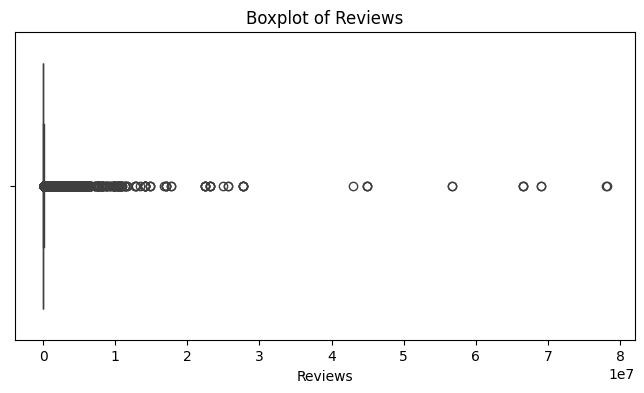

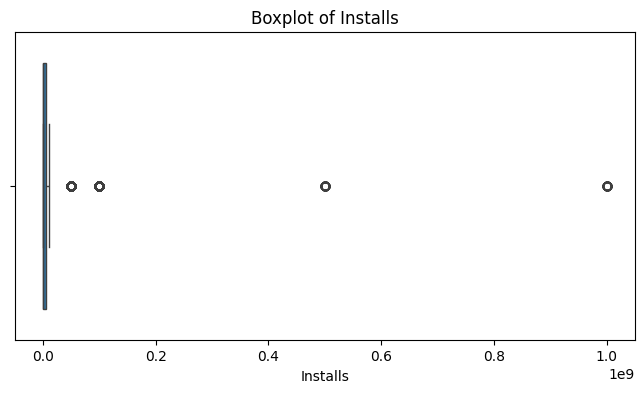

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
# Removing Outliers using z-Scores:
from scipy import stats
z_score=np.abs(stats.zscore(df[numeric_cols]))

In [ ]:
df= df[~ (z_score > 3).any(axis=1)]

In [ ]:
df.head()

,Category,Rating,Reviews,Installs,Type,Content Rating
0,ART_AND_DESIGN,4.1,159,10000,Free,Everyone
1,ART_AND_DESIGN,3.9,967,500000,Free,Everyone
2,ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone
3,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen
4,ART_AND_DESIGN,4.3,967,100000,Free,Everyone


In [ ]:
for col in df.columns:
  if df[col].dtypes == 'object':
    print(df[col].nunique())

33
1
6


In [ ]:
map_dict= df.groupby('Category')['Rating'].mean().to_dict()
df['Category']=df['Category'].map(map_dict)

/tmp/ipython-input-1081044307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category']=df['Category'].map(map_dict)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Content Rating']=le.fit_transform(df['Content Rating'])

/tmp/ipython-input-1609349326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content Rating']=le.fit_transform(df['Content Rating'])


In [ ]:
df.head()

,Category,Rating,Reviews,Installs,Type,Content Rating
0,4.331752,4.1,159,10000,Free,1
1,4.331752,3.9,967,500000,Free,1
2,4.331752,4.7,87510,5000000,Free,1
3,4.331752,4.5,215644,50000000,Free,4
4,4.331752,4.3,967,100000,Free,1


Cross Validation:

In [ ]:
x=df.drop(columns='Type').copy()

In [ ]:
x

,Category,Rating,Reviews,Installs,Content Rating
0,4.331752,4.100000,159,10000,1
1,4.331752,3.900000,967,500000,1
2,4.331752,4.700000,87510,5000000,1
3,4.331752,4.500000,215644,50000000,4
4,4.331752,4.300000,967,100000,1
...,...,...,...,...,...
10836,4.207644,4.500000,38,5000,1
10837,4.207644,5.000000,4,100,1
10838,4.262062,4.189551,3,1000,1
10839,4.334776,4.500000,114,1000,3


In [ ]:
y=df['Rating'].copy()

In [ ]:
x.describe()

,Category,Rating,Reviews,Installs,Content Rating
count,9257.000000,9257.000000,9.257000e+03,9.257000e+03,9257.000000
mean,4.220114,4.220114,2.150230e+05,6.797761e+06,1.470455
std,0.063878,0.392641,7.969240e+05,1.989489e+07,1.016298
min,4.081665,2.800000,0.000000e+00,0.000000e+00,0.000000
25%,4.184457,4.100000,3.900000e+01,5.000000e+03,1.000000
50%,4.207644,4.200000,2.319000e+03,1.000000e+05,1.000000
75%,4.268833,4.500000,5.197300e+04,5.000000e+06,1.000000
max,4.365269,5.000000,8.389714e+06,1.000000e+08,5.000000


Cross Validation:

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

Model Training:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=model.predict(x_test)

Model Evaluation:

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
rms=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print("Root Mean Square:",rms)
print('R2 Score:',r2)

Root Mean Square: 1.3989800708859258e-28
R2 Score: 1.0


In [ ]:
round(rms)

0